/var/folders/d5/h1b6y3z95gz3s4_1d6r76l200000gn/T/ipykernel_74189/3331311406.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


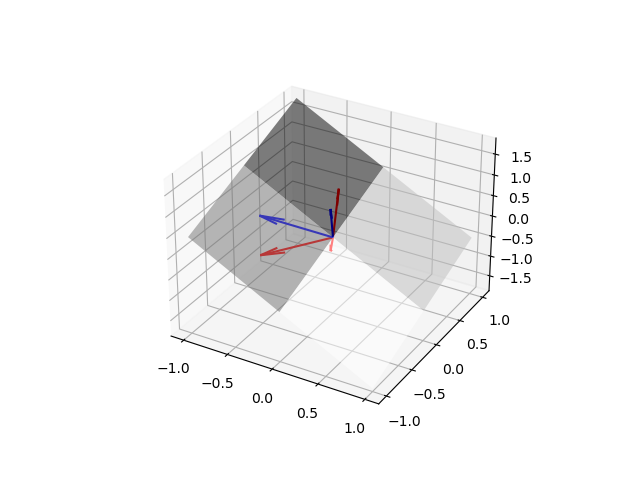

In [52]:
%matplotlib widget
edges = [
    (0,1),
    (0,2),
    (1,3),
    (1,4),
    (2,3),
    (3,4)
]
import scipy.linalg as la
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
X = cp.Variable((5,5), symmetric=True)

constraints = [X >> 0]
constraints += [
    X[i, i] == 1 for i in range(5)
]

objective = sum( .5*(1-X[i, j]) for (i, j) in edges)

prob = cp.Problem(cp.Maximize(objective), constraints)
prob.solve()
x = la.sqrtm(X.value)
evals, evects = np.linalg.eigh(X.value)
sdp_vectors = evects.T[evals > float(1.0E-6)].T
vectorss = sdp_vectors

u = np.random.randn(5)
point  = np.array([0, 0, 0])
normal = np.array(u @ vectorss)
signs = np.sign( u @ x)
fig = plt.figure()
ax = fig.gca(projection='3d')
fr = [(0,0,0), (0,0,0), (0,0,0), (0,0,0), (0,0,0)]
color_dict = ['r' if signs[i] > 0 else 'b' for i in range(len(signs))]

i = 0
for (from_, sdp_vectors) in zip(fr,sdp_vectors):
    ax.quiver(*from_, *sdp_vectors, color = color_dict[i])
    i+= 1


# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-1,2), range(-1,2))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
ax.plot_surface(xx, yy, z, alpha=.5, cmap='Greys')
plt.show()